<a href="https://colab.research.google.com/github/SathsaraniBS/CS102.3_Programming-in-C_30027/blob/main/Batarenage_Sanduni_Sathsarani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import iqr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:

data = pd.read_csv('dailyActivity_merged.csv')


In [ ]:
data.info()
data.describe()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              456 non-null    object 
 2   TotalSteps                451 non-null    float64
 3   TotalDistance             453 non-null    float64
 4   TrackerDistance           448 non-null    float64
 5   LoggedActivitiesDistance  456 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  453 non-null    float64
 8   LightActiveDistance       453 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       456 non-null    float64
 12  LightlyActiveMinutes      453 non-null    float64
 13  SedentaryMinutes          456 non-null    float64
 14  Calories  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/16,11004.0,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12.0,205.0,804.0,1819.0
1,1503960366,3/26/16,17609.0,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17.0,274.0,588.0,2154.0
2,1503960366,3/27/16,12736.0,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5.0,268.0,605.0,1944.0
3,1503960366,3/28/16,13231.0,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20.0,224.0,1080.0,1932.0
4,1503960366,3/29/16,12041.0,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28.0,243.0,763.0,1886.0


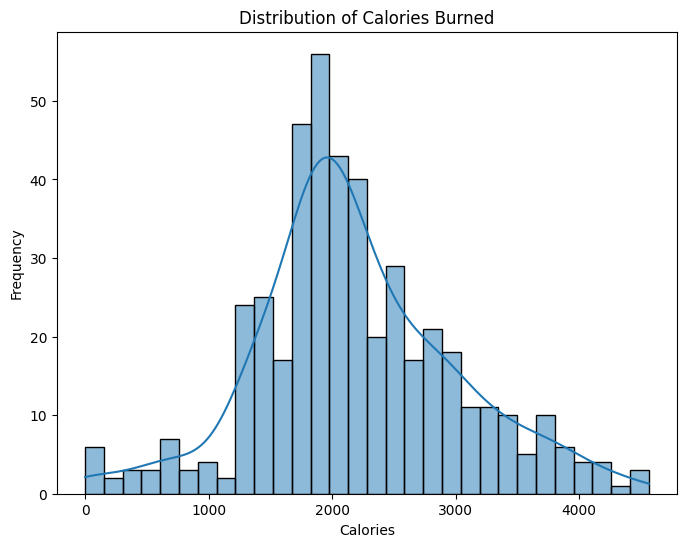

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Calories'], kde=True, bins=30)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

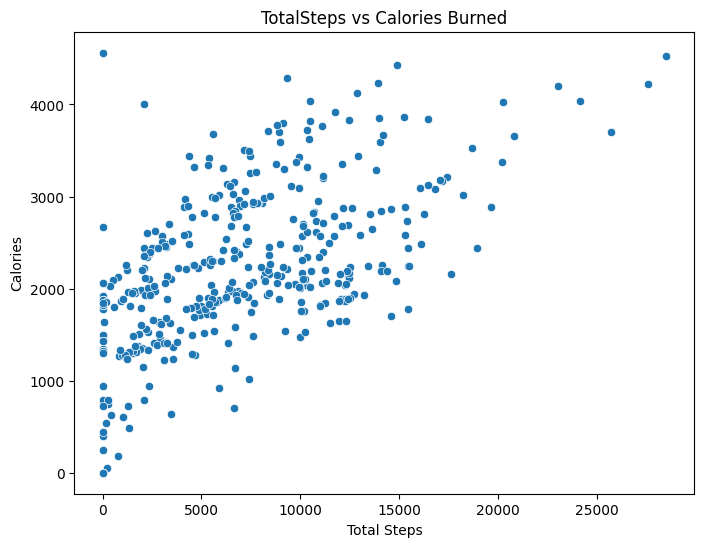

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['TotalSteps'], y=data['Calories'])
plt.title('TotalSteps vs Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()

In [ ]:
# Handle missing values
print("\nMissing Values Before Imputation:")
print(data.isnull().sum())
imputer = SimpleImputer(strategy='median')
data[data.columns[2:]] = imputer.fit_transform(data[data.columns[2:]])
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values Before Imputation:
Id                          0
ActivityDate                1
TotalSteps                  6
TotalDistance               4
TrackerDistance             9
LoggedActivitiesDistance    1
VeryActiveDistance          0
ModeratelyActiveDistance    4
LightActiveDistance         4
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         1
LightlyActiveMinutes        4
SedentaryMinutes            1
Calories                    5
dtype: int64

Missing Values After Imputation:
Id                          0
ActivityDate                1
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [ ]:

for col in data.columns[2:]:
    col_iqr = iqr(data[col])
    lower = data[col].quantile(0.25) - 1.5 * col_iqr
    upper = data[col].quantile(0.75) + 1.5 * col_iqr
    data[col] = np.clip(data[col], lower, upper)

print("\nDataset Description After Outlier Handling:")
print(data.describe())


Dataset Description After Outlier Handling:
                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  4.570000e+02    457.000000     457.000000       457.000000   
mean   4.628595e+09   6445.884026       4.550733         4.478107   
std    2.293781e+09   5224.413047       3.759187         3.700651   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.347168e+09   1988.000000       1.410000         1.280000   
50%    4.057193e+09   5893.000000       4.020000         4.050000   
75%    6.391747e+09  10146.000000       7.100000         7.010000   
max    8.877689e+09  22383.000000      15.635000        15.605001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                     457.0          457.000000                457.000000   
mean                        0.0            0.787309                  0.381805   
std                         0.0            1.180223                  0.531170   
min      

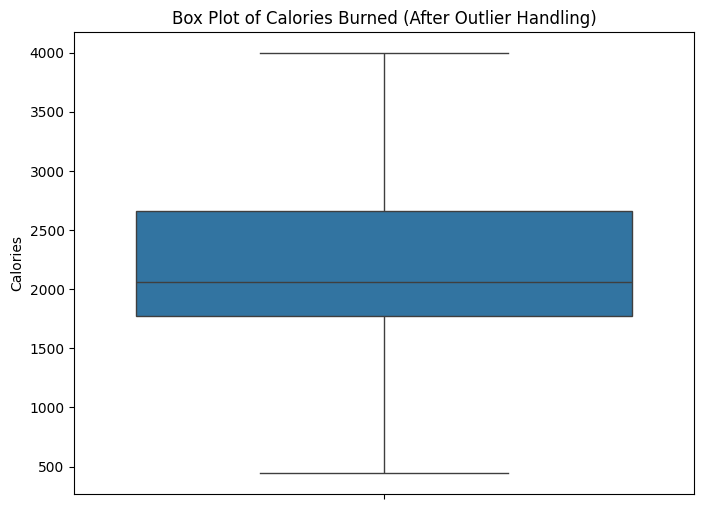

In [ ]:
# Plot 3: Box plot of Calories (post-outlier handling)
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Calories'])
plt.title('Box Plot of Calories Burned (After Outlier Handling)')
plt.ylabel('Calories')
plt.show()

In [ ]:
# Drop columns that are not necessary for the prediction
data.drop(['Id', 'ActivityDate' ,'LoggedActivitiesDistance','SedentaryActiveDistance'], axis=1, inplace=True)

#fill missing values
data['TotalSteps'].fillna(0, inplace=True)

#drop missing values
data.dropna(inplace=True)


/tmp/ipython-input-4221471172.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalSteps'].fillna(0, inplace=True)


In [ ]:
data.head()

,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,11004.0,7.11,7.11,2.570,0.46,4.07,33.0,12.0,205.0,804.0,1819.0
1,17609.0,11.55,11.55,3.275,0.73,3.91,62.5,17.0,274.0,588.0,2154.0
2,12736.0,8.53,8.53,3.275,0.16,3.71,56.0,5.0,268.0,605.0,1944.0
3,13231.0,8.93,8.93,3.190,0.79,4.95,39.0,20.0,224.0,1080.0,1932.0
4,12041.0,7.85,7.85,2.160,1.09,4.61,28.0,28.0,243.0,763.0,1886.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = ['TotalSteps','TotalDistance','TrackerDistance',
            'VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance',
            'VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes',
            'SedentaryMinutes']

X = data[features]
y = data['Calories']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)

X_scaled.head()







,TotalSteps,TotalDistance,TrackerDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,0.491623,0.454749,0.455623,0.784733,0.283077,0.413408,0.528,0.300,0.376838,0.548295
1,0.786713,0.738727,0.740147,1.000000,0.449231,0.397156,1.000,0.425,0.503676,0.394886
2,0.569003,0.545571,0.546620,1.000000,0.098462,0.376841,0.896,0.125,0.492647,0.406960
3,0.591118,0.571154,0.572252,0.974046,0.486154,0.502793,0.624,0.500,0.411765,0.744318
4,0.537953,0.502079,0.503044,0.659542,0.670769,0.468258,0.448,0.700,0.446691,0.519176


In [ ]:
#(is there any missing values?)
print(data.isnull().sum())


TotalSteps                  0
TotalDistance               0
TrackerDistance             0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [ ]:
# Define features and target variable
X = data.drop('Calories', axis=1) #drop the feature that goining to assign for a y variable
y = data['Calories'] #y the predicting varible has assigned

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #to improve the model

In [ ]:
# Standardize features for Logistic Regression and Neural Network
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Decision Tree Regressor with GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_model = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)
dt_model_best = DecisionTreeRegressor(**best_params, random_state=42)
dt_model_best.fit(X_train, y_train)
y_pred_dt = dt_model_best.predict(X_test)



Best Hyperparameters:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
136 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

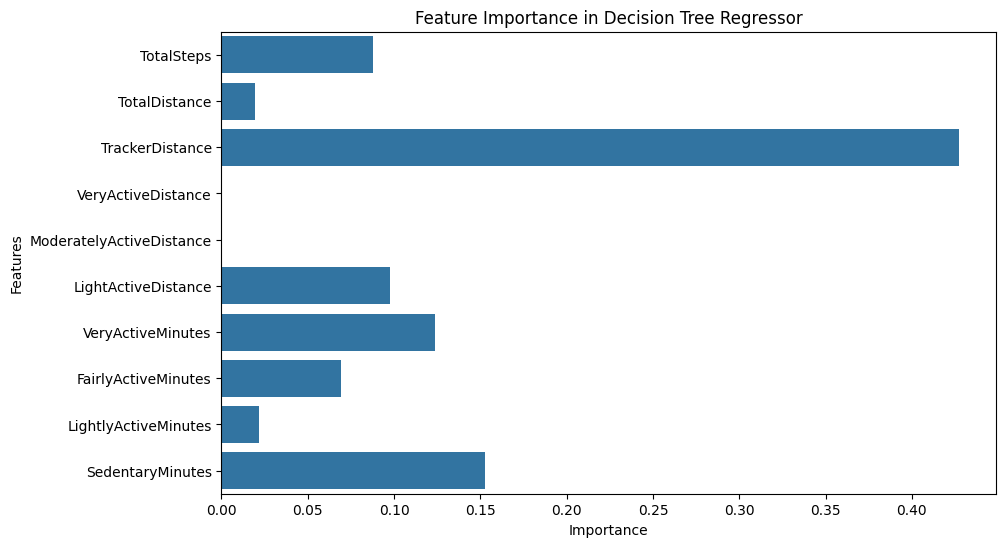

In [ ]:
importances = dt_model_best.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

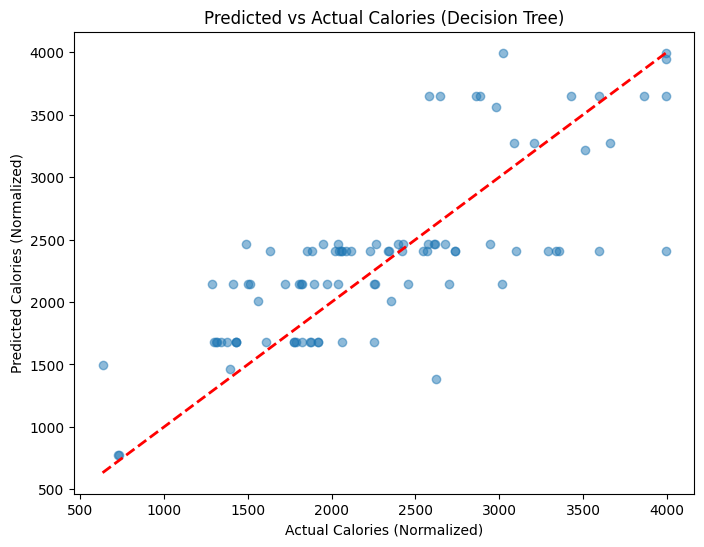

In [ ]:
# Plot 5: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Calories (Decision Tree)')
plt.xlabel('Actual Calories (Normalized)')
plt.ylabel('Predicted Calories (Normalized)')
plt.show()

In [ ]:
# Evaluate the model
print("\nDecision Tree Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_dt):.4f}")
print(f"R-squared (R²): {r2_score(y_test, y_pred_dt):.4f}")


Decision Tree Regressor Evaluation:
Mean Absolute Error (MAE): 396.3721
Mean Squared Error (MSE): 261931.8248
R-squared (R²): 0.5699


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

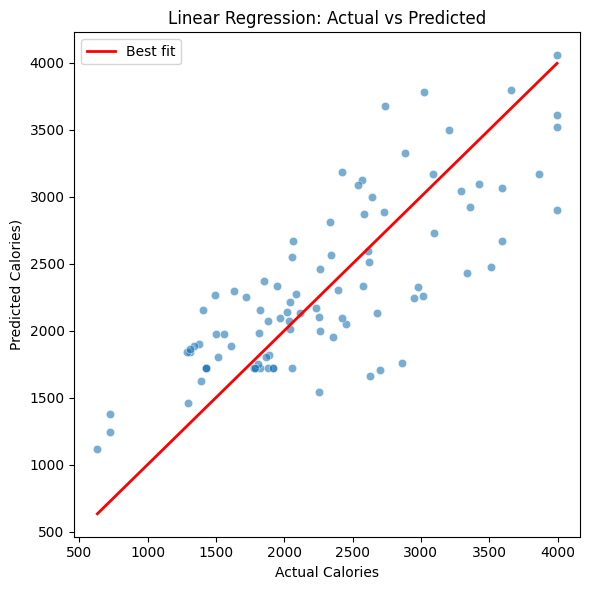

In [ ]:
#drawing a graph for linear Regression
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='-', linewidth=2, label='Best fit')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories)")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest Regressor with GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti


Best Hyperparameters:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Train model with best parameters
rf_model_best = RandomForestRegressor(**best_params, random_state=42)
rf_model_best.fit(X_train, y_train)
y_pred_rf = rf_model_best.predict(X_test)

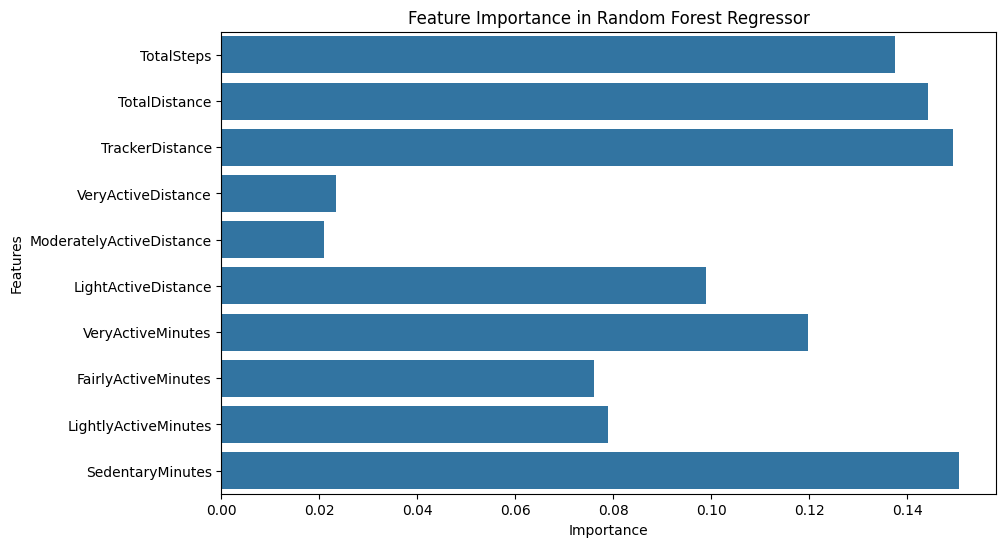

In [ ]:
importances = rf_model_best.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

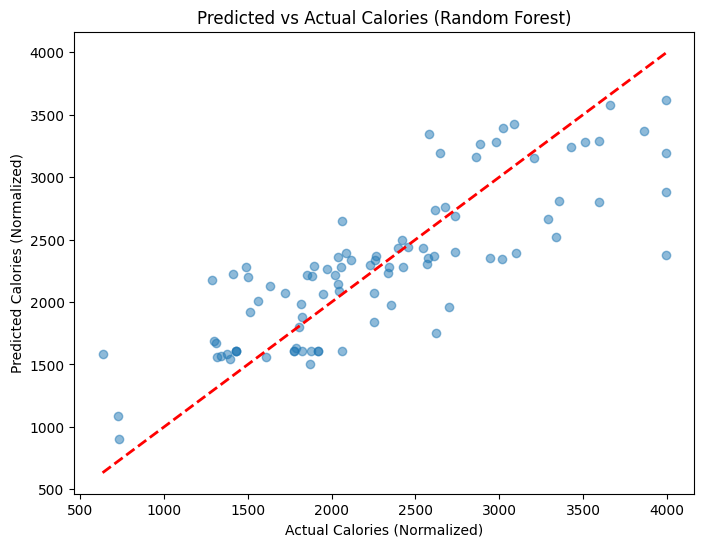

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Calories (Random Forest)')
plt.xlabel('Actual Calories (Normalized)')
plt.ylabel('Predicted Calories (Normalized)')
plt.show()

In [ ]:
# Evaluate the model
print("\nRandom Forest Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"R-squared (R²): {r2_score(y_test, y_pred_rf):.4f}")


Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 352.8541
Mean Squared Error (MSE): 204478.1713
R-squared (R²): 0.6642


**# Neural Network**

In [ ]:
# Define Neural Network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])
    return model

In [ ]:
# Create and train the model
model = create_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


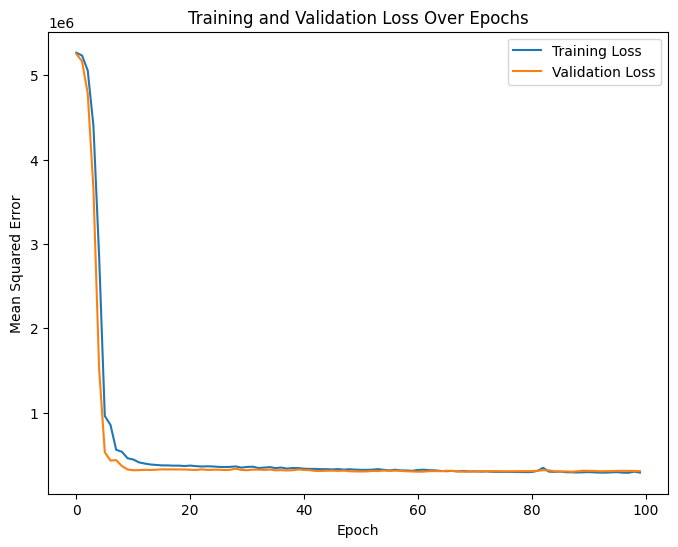

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


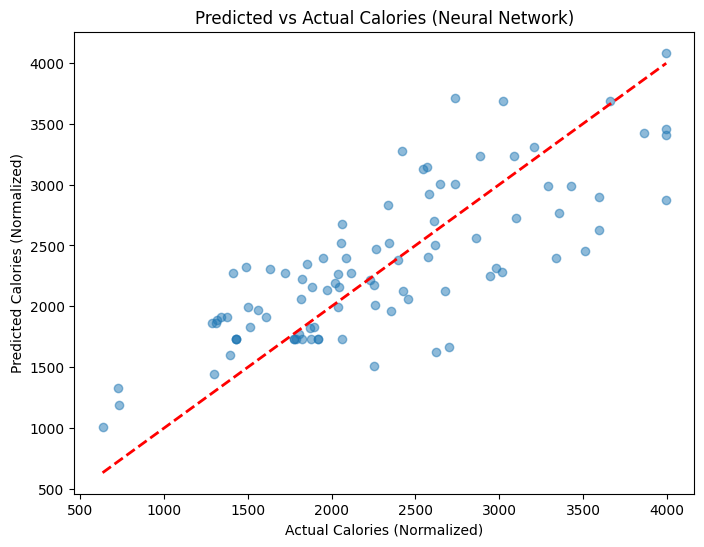

In [ ]:
# Make predictions
y_pred_nn = model.predict(X_test).flatten()

# Plot 5: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Calories (Neural Network)')
plt.xlabel('Actual Calories (Normalized)')
plt.ylabel('Predicted Calories (Normalized)')
plt.show()

In [ ]:
# Evaluate the model
print("\nNeural Network Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_nn):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_nn):.4f}")
print(f"R-squared (R²): {r2_score(y_test, y_pred_nn):.4f}")


Neural Network Regressor Evaluation:
Mean Absolute Error (MAE): 403.9824
Mean Squared Error (MSE): 240759.0321
R-squared (R²): 0.6047


In [ ]:
def create_model(my_learning_rate, input_dim):

    # Define input
    inputs = Input(shape=(input_dim,), name="all_features")
    # Hidden layers
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile with RMSprop optimizer
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
        loss='mse',
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return model

In [ ]:
# Hyperparameters
learning_rate = 0.01
epochs = 100
batch_size = 32

# Build model
input_dim = X_train_prep.shape[1]
model = create_model(learning_rate, input_dim)

# Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train_prep, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stop],
    verbose=1
)

NameError: name 'X_train_prep' is not defined

In [ ]:
y_pred_nn = model.predict(X_test_prep).flatten()

NameError: name 'X_test_prep' is not defined